## Analyze cleaned sales report: top customers, monthly trend, refunds

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
ROOT = Path().resolve().parent

parquet_path = ROOT / "data" / "clean" /"retail_generated_70_clean.parquet"

df = pd.read_parquet(parquet_path)

len(df), df.dtypes

(56,
 delivery_note             int64
 date             datetime64[ns]
 customer_id               int64
 amount                  float64
 vat                     float64
 total                   float64
 invoice_num               int64
 dtype: object)

In [21]:
df.head()
df.describe(include="all")

,delivery_note,date,customer_id,amount,vat,total,invoice_num
count,56.000000,56,56.000000,56.000000,56.000000,56.000000,56.000000
mean,34257.839286,2024-10-31 15:51:25.714285824,2969.303571,227.134286,48.883036,281.658036,8388.535714
min,28903.000000,2024-09-13 00:00:00,266.000000,-75.990000,0.030000,0.170000,6947.000000
25%,28916.750000,2024-09-13 00:00:00,1741.250000,5.682500,1.705000,9.805000,7636.750000
50%,32407.500000,2024-10-14 00:00:00,3528.000000,15.175000,4.015000,23.155000,8402.500000
75%,37748.250000,2024-11-30 00:00:00,4242.000000,41.867500,10.110000,58.250000,9117.750000
max,40273.000000,2024-12-31 00:00:00,5392.000000,8669.610000,1820.620000,10490.230000,10318.000000
std,4272.310960,NaN,1497.789728,1170.030310,245.469490,1414.370487,987.894657


In [22]:
top_customers = (
    df.groupby("customer_id", as_index=False)["total"]
      .sum()
      .sort_values("total", ascending=False)
      .head(10)
)
top_customers

,customer_id,total
32,5115,10490.23
8,774,1588.13
27,3528,1323.05
23,2938,504.40
18,2491,453.85
30,4242,262.56
5,495,106.43
0,266,105.02
13,1697,97.41
24,2973,92.55


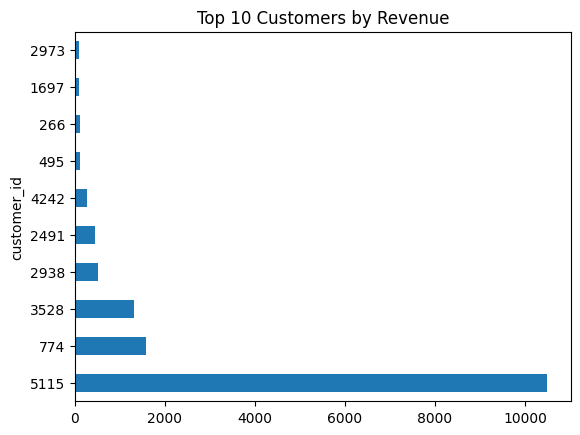

In [23]:
top_customers.plot(kind="barh", x="customer_id", y="total", legend=False)
plt.title("Top 10 Customers by Revenue")
plt.show()

In [24]:
df["month"] = df["date"].dt.to_period("M").dt.to_timestamp()
monthly = df.groupby("month", as_index=False)["total"].sum()
monthly

,month,total
0,2024-09-01,891.58
1,2024-10-01,1847.41
2,2024-11-01,1832.20
3,2024-12-01,11201.66


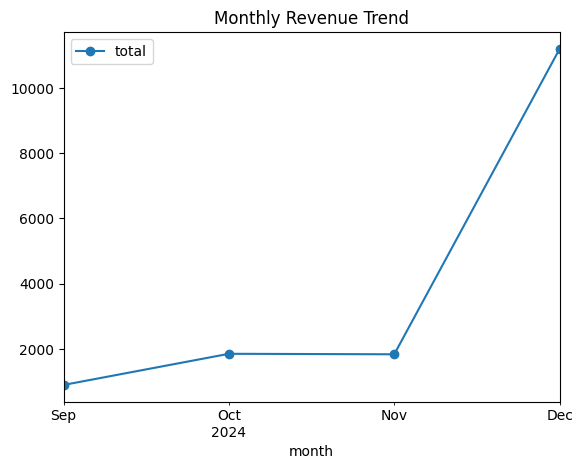

In [25]:
monthly.plot(x="month", y="total", kind="line", marker="o")
plt.title("Monthly Revenue Trend")
plt.show()

In [26]:
refunds = df[df["total"] < 0].copy()
refunds_summary = (
    refunds.groupby("customer_id", as_index=False)["total"]
           .sum()
           .sort_values("total")
)
refunds_summary.head()

,customer_id,total


IndexError: index 0 is out of bounds for axis 0 with size 0

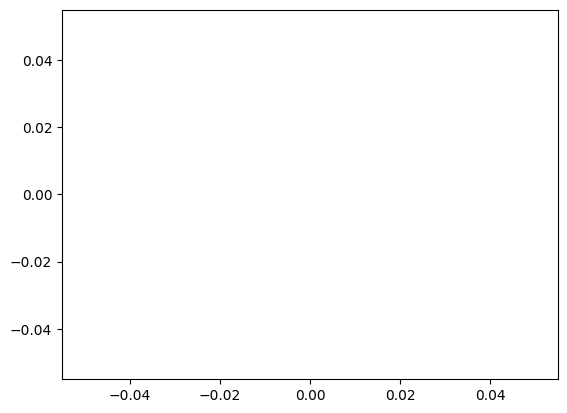

In [27]:
refunds_summary.head(10).plot(kind="barh", x="customer_id", y="total", legend=False)
plt.title("Top Refund Customers")
plt.show()